# Sensitivity Analysis: RfR
### The goal is to intervene in the system, starting from the parameters to which the model is most sensitive.
Global sensitivity analysis: uncertain inputs are sampled at the same time (e.g. with Monte Carlo/Latin Hypercube), instead of checking each input separately, next we try to understand how uncertainty in model output is a function of uncertainty in model input.
#### The following sensitivity analysis aims to:
- Find which uncertain inputs are more influential on outputs;
- How much of the uncertainty is epistemic; how much is irreducible;
- Which uncertain inputs should be a priority for research;
- Which inputs be left out/aggregated to simplify the model.

#### Methods:
- Sobol sampling

## Import packages

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ema_workbench import (Model, 
                           ScalarOutcome,
                           TimeSeriesOutcome,
                           IntegerParameter,
                           CategoricalParameter,
                           RealParameter, 
                           perform_experiments, 
                           ema_logging,
                           Policy, 
                           MultiprocessingEvaluator, 
                           save_results, 
                           load_results, 
                           Scenario)

from ema_workbench.em_framework.evaluators import SOBOL
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from SALib.analyze import sobol

from dike_model_function import DikeNetwork  # @UnresolvedImport
from dike_model_function_time_series import DikeNetworkTS  # @UnresolvedImport
from problem_formulation_V2_5 import get_model_for_actor_problem_formulation

## Importing the model
Importing the RfR model using a custom function for convenience.

In [2]:
# Problem formulations:
#    get_model_for_actor_problem_formulation(problem_formulation_id, outcome_type='time_series')
#    problem_formulation_id options
#        1 - RWS (GOOD)
#        2 - Environmental interest group
#        3 - Transport company 
#        4 - Delta commission
#        5 - Gelderland (GOOD)
#        6 - Overijssel (GOOD)s
#        7 - Dike rings 1 and 2
#        8 - Dike ring 3
#        9 - Dike ring 4
#        10 - Dike ring 5
#
#    outcome_type options
#        'time_series' (default)
#        'scalar'

model, planning_steps = get_model_for_actor_problem_formulation(1, outcome_type='scalar')

# Sobol global sensitivity analysis over Uncertainties

In [3]:
# Define uncertainties and convert them to SALib desired format
uncertainties = []
for unc in model.uncertainties:
    uncertainties.append(unc)
    
# for lev in model.levers:
#     uncertainties.append(lev)

problem = get_SALib_problem(uncertainties)

In [4]:
# # Define the 'non-policy', setting all policy levers to zero
levers = []
for lev in model.levers:
    levers.append(lev)
    
# non_policy = Policy("No action", **{l.name:0 for l in levers})

In [5]:
levers

[]

In [6]:
problem

{'num_vars': 50,
 'names': ['0_RfR 0',
  '0_RfR 1',
  '0_RfR 2',
  '1_RfR 0',
  '1_RfR 1',
  '1_RfR 2',
  '2_RfR 0',
  '2_RfR 1',
  '2_RfR 2',
  '3_RfR 0',
  '3_RfR 1',
  '3_RfR 2',
  '4_RfR 0',
  '4_RfR 1',
  '4_RfR 2',
  'A.0_ID flood wave shape',
  'A.1_Bmax',
  'A.1_Brate',
  'A.1_DikeIncrease 0',
  'A.1_DikeIncrease 1',
  'A.1_DikeIncrease 2',
  'A.1_pfail',
  'A.2_Bmax',
  'A.2_Brate',
  'A.2_DikeIncrease 0',
  'A.2_DikeIncrease 1',
  'A.2_DikeIncrease 2',
  'A.2_pfail',
  'A.3_Bmax',
  'A.3_Brate',
  'A.3_DikeIncrease 0',
  'A.3_DikeIncrease 1',
  'A.3_DikeIncrease 2',
  'A.3_pfail',
  'A.4_Bmax',
  'A.4_Brate',
  'A.4_DikeIncrease 0',
  'A.4_DikeIncrease 1',
  'A.4_DikeIncrease 2',
  'A.4_pfail',
  'A.5_Bmax',
  'A.5_Brate',
  'A.5_DikeIncrease 0',
  'A.5_DikeIncrease 1',
  'A.5_DikeIncrease 2',
  'A.5_pfail',
  'EWS_DaysToThreat',
  'discount rate 0',
  'discount rate 1',
  'discount rate 2'],
 'bounds': [(0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0

In [7]:
# Perform experiments using Sobol sampling over uncertainties, evaluating over non_policy

ema_logging.log_to_stderr(ema_logging.INFO)

n_scenario = 2

with MultiprocessingEvaluator(model) as evaluator:
    experiments_sobol, outcomes_sobol = evaluator.perform_experiments(scenarios=n_scenario,
                                                                      uncertainty_sampling=SOBOL)
    
results_uncertainty = experiments_sobol, outcomes_sobol

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 204 scenarios * 1 policies * 1 model(s) = 204 experiments


0_RfR 0 0.0
0_RfR 0 0
0_RfR 1 0.0
0_RfR 1 0
0_RfR 2 0.0
0_RfR 2 0
1_RfR 0 0.0
1_RfR 0 0
1_RfR 1 0.0
1_RfR 1 0
1_RfR 2 0.0
1_RfR 2 0
2_RfR 0 0.0
2_RfR 0 0
2_RfR 1 0.0
2_RfR 1 0
2_RfR 2 0.0
2_RfR 2 0
3_RfR 0 0.0
3_RfR 0 0
3_RfR 1 0.0
3_RfR 1 0
3_RfR 2 0.0
3_RfR 2 0
4_RfR 0 0.0
4_RfR 0 0
4_RfR 1 0.0
4_RfR 1 0
4_RfR 2 0.0
4_RfR 2 0
A.0_ID flood wave shape 48.0
A.0_ID flood wave shape 48
A.1_Brate 0.0
A.1_Brate 0
A.1_DikeIncrease 0 9.0
A.1_DikeIncrease 0 9
A.1_DikeIncrease 1 7.0
A.1_DikeIncrease 1 7
A.1_DikeIncrease 2 5.0
A.1_DikeIncrease 2 5
A.2_Brate 1.0
A.2_Brate 1
A.2_DikeIncrease 0 5.0
A.2_DikeIncrease 0 5
A.2_DikeIncrease 1 9.0
A.2_DikeIncrease 1 9
A.2_DikeIncrease 2 0.0
A.2_DikeIncrease 2 0
A.3_Brate 0.0
A.3_Brate 0
A.3_DikeIncrease 0 1.0
A.3_DikeIncrease 0 1
A.3_DikeIncrease 1 1.0
A.3_DikeIncrease 1 1
A.3_DikeIncrease 2 2.0
A.3_DikeIncrease 2 2
A.4_Brate 1.0
A.4_Brate 1
A.4_DikeIncrease 0 8.0
A.4_DikeIncrease 0 8
A.4_DikeIncrease 1 8.0
A.4_DikeIncrease 1 8
A.4_DikeIncrease 2 3.0
A.4

[MainProcess/INFO] 20 cases completed
[MainProcess/INFO] terminating pool
Process ForkPoolWorker-4:
Process ForkPoolWorker-1:
Process ForkPoolWorker-3:
Process ForkPoolWorker-2:
Traceback (most recent call last):
  File "/Users/philipseijger/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/philipseijger/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/philipseijger/anaconda3/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True, func(*args, **kwds))
  File "/Users/philipseijger/anaconda3/lib/python3.7/site-packages/ema_workbench/em_framework/ema_multiprocessing.py", line 169, in worker
    return experiment, experiment_runner.run_experiment(experiment)
  File "/Users/philipseijger/anaconda3/lib/python3.7/site-packages/ema_workbench/em_framework/experiment_runner.py", line 84, in run_experiment
    model.run_model(scenario, p

KeyboardInterrupt: 

In [10]:
import ema_workbench

ema_workbench.__version__

'2.0.3'

In [11]:
from ema_workbench.em_framework.salib_samplers import get_SALib_problem

In [12]:
problem = get_SALib_problem(model.uncertainties)

In [13]:
from SALib.sample import saltelli

samples = saltelli.sample(problem, 2, calc_second_order=True)

In [14]:
np.unique(samples[:, 0])

array([0.21972656, 0.35253906, 0.71972656, 0.85253906])

In [16]:
experiments_sobol.iloc[:, 0].unique()

array([0.])

In [18]:
# save_results(results_uncertainty,'Outputs/experiments_sobol_2000cases.tar.gz' )

In [9]:
experiments_sobol['2_RfR 2'].mean()

0.0

In [15]:
# Expected Annual Damage Sobol outcomes
EAD_final_sobol = outcomes_sobol['Expected Annual Damage']
EAD_score = sobol.analyze(problem, EAD_final_sobol, calc_second_order=True, print_to_console=False)

# Total Investment Costs Sobol outcomes - USING non-policy THIS REMAINS ZERO
TIC_final_sobol = outcomes_sobol['Total Investment Costs']
TIC_score = sobol.analyze(problem, TIC_final_sobol, calc_second_order=True, print_to_console=False)

# Expected Number of Deaths Sobol outcomes
END_final_sobol = outcomes_sobol['Expected Number of Deaths']
END_score = sobol.analyze(problem, END_final_sobol, calc_second_order=True, print_to_console=False)

In [28]:
def plot_sobol_interaction(sobol_score):
    Si_filter = {k:sobol_score[k] for k in ['ST','ST_conf','S1','S1_conf']}
    Si_df = pd.DataFrame(Si_filter, index=problem['names'])

    sns.set_style('white')
    fig, ax = plt.subplots(1)

    indices = Si_df[['S1','ST']]
    err = Si_df[['S1_conf','ST_conf']]

    indices.plot.bar(yerr=err.values.T,ax=ax)
    fig.set_size_inches(16,12)
    fig.subplots_adjust(bottom=0.3)
    plt.title('Sobol Score')
    ax.set(xlabel='Uncertainty', ylabel='Fraction of total variance')
    plt.show()
    
# We can also study the convergence of the Sobol indices as a function of the number of samples,
# by computing the indices over a partial sample:

def plot_sobol_convergence(final_sobol):

    s_data = pd.DataFrame(index=problem['names'],
                          columns=np.arange(1,n_scenario,20)*(2*problem['num_vars']+2))
    for j in s_data.columns:
        scores = sobol.analyze(problem, final_sobol[0:j], calc_second_order=True, print_to_console=False)
        s_data.loc[:,j] = scores['ST']
        
    fig, ax = plt.subplots(1)
    fig.set_size_inches(16,10)

    s_data.T.plot(ax=ax)
    ax.set_xlabel('Samples')
    ax.set_xlim(left=0, right=1200)
    ax.set_ylabel('Total index (ST)')
    plt.title('Sobol Convergence')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

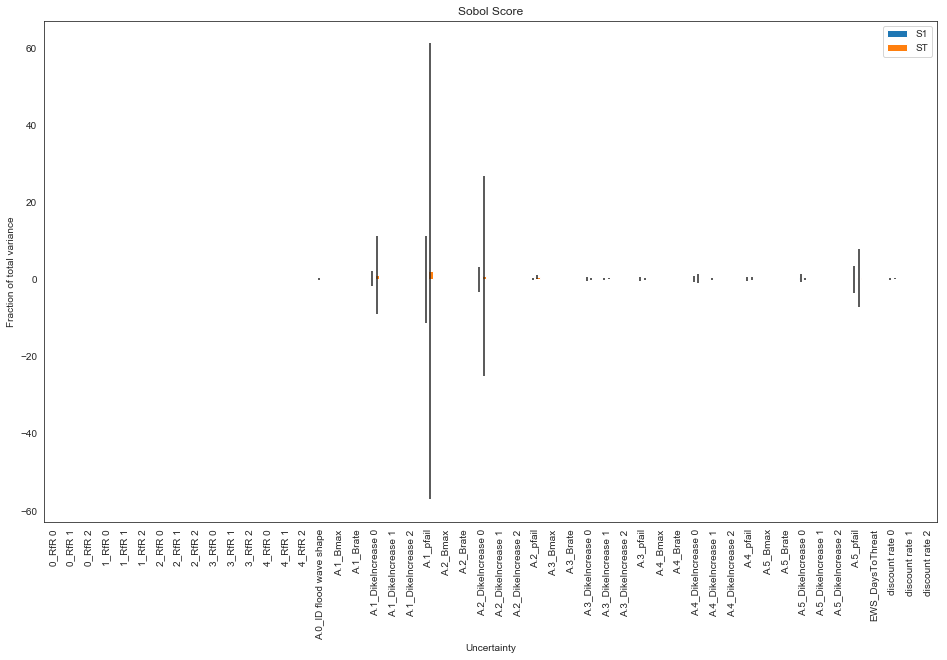

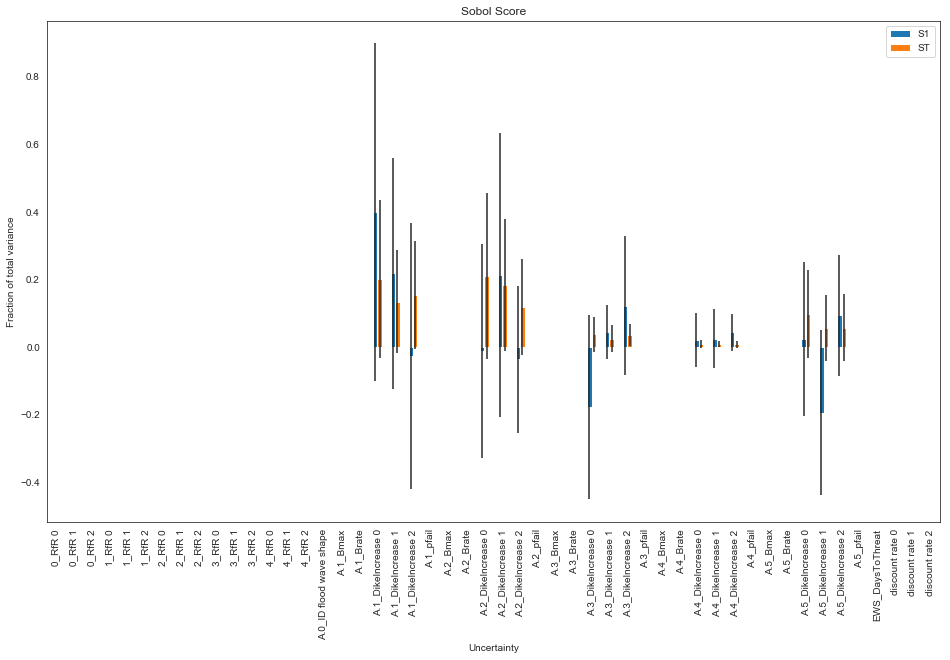

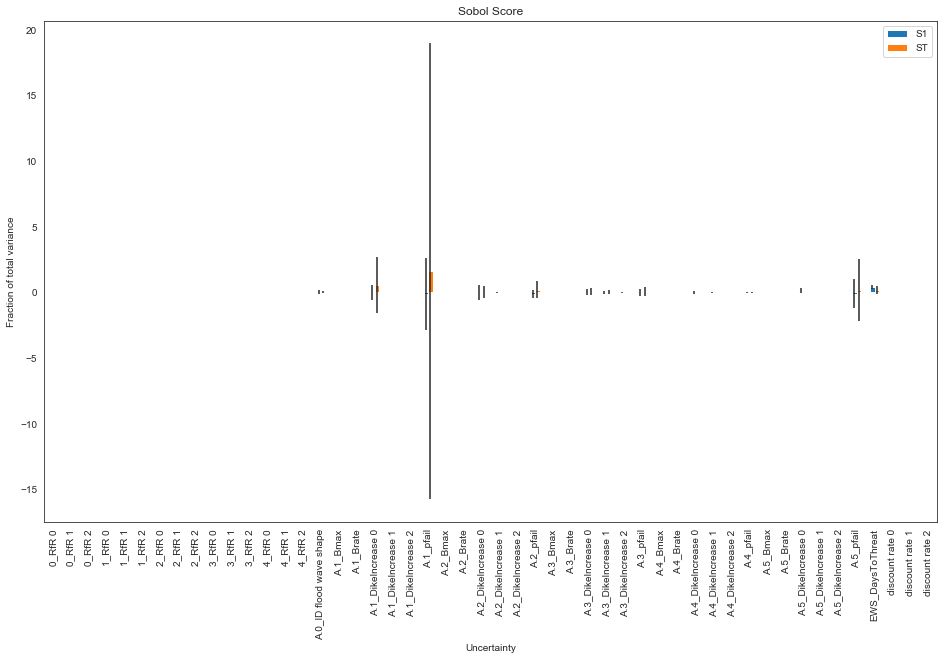

In [17]:
plot_sobol_interaction(EAD_score)
plot_sobol_interaction(TIC_score)
plot_sobol_interaction(END_score)

/Users/philipseijger/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=102.0, right=102.0
  ax.set_xlim(left, right)
/Users/philipseijger/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=102.0, right=102.0
  ax.set_xlim(left, right)
/Users/philipseijger/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=102.0, right=102.0
  ax.set_xlim(left, right)
/Users/philipseijger/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=102.0, right=102.0
  a

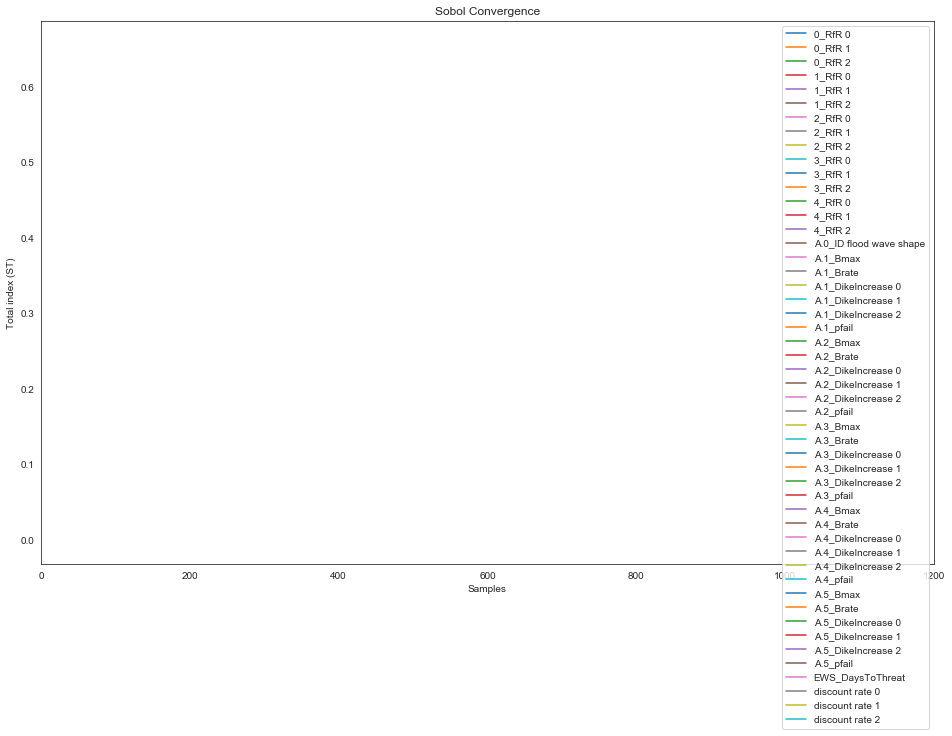

/Users/philipseijger/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=102.0, right=102.0
  ax.set_xlim(left, right)
/Users/philipseijger/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=102.0, right=102.0
  ax.set_xlim(left, right)
/Users/philipseijger/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=102.0, right=102.0
  ax.set_xlim(left, right)
/Users/philipseijger/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=102.0, right=102.0
  a

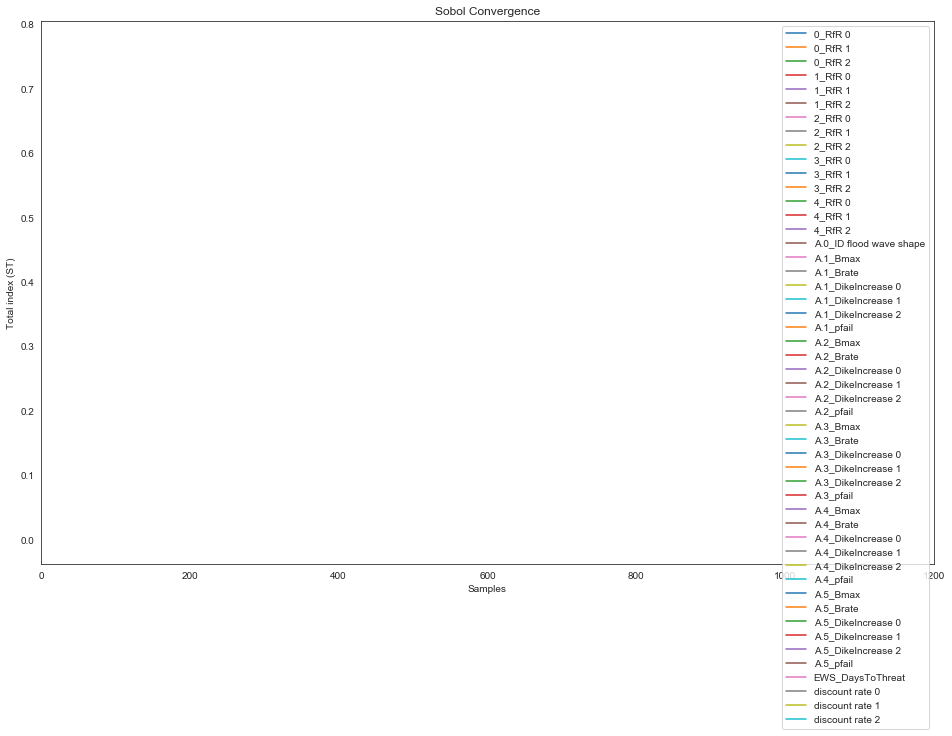

/Users/philipseijger/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=102.0, right=102.0
  ax.set_xlim(left, right)
/Users/philipseijger/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=102.0, right=102.0
  ax.set_xlim(left, right)
/Users/philipseijger/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=102.0, right=102.0
  ax.set_xlim(left, right)
/Users/philipseijger/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=102.0, right=102.0
  a

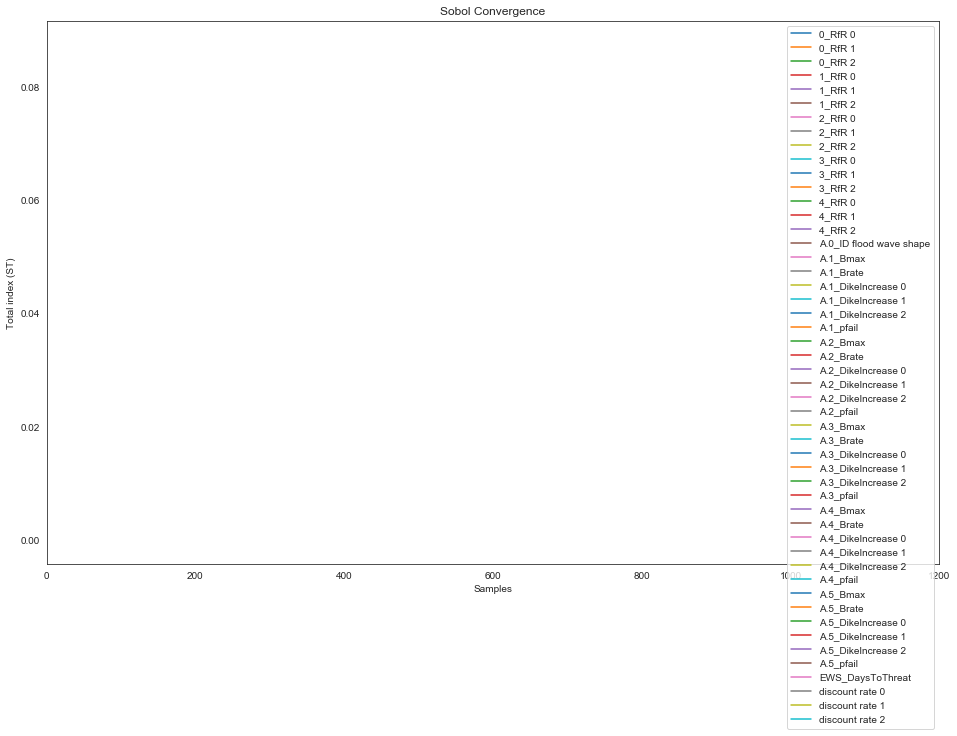

In [29]:
plot_sobol_convergence(EAD_final_sobol)
plot_sobol_convergence(TIC_final_sobol)
plot_sobol_convergence(END_final_sobol)

# Sobol global sensitivity analysis over LEVERS

In [69]:
# Import model
model, planning_steps = get_model_for_actor_problem_formulation(3, outcome_type='scalar')

# Define LEVERS and convert them to SALib desired format
levers = []
for lev in model.levers:
    levers.append(lev)

problem_levers = get_SALib_problem(levers)

In [70]:
# Define the 'non-uncertainty', setting all uncertainties to zero
reference_values = {'Bmax': 175, 
                      'Brate': 1.5, 
                      'pfail': 0.5,
                      'discount rate': 3.5,
                      'ID flood wave shape': 4}

reference_values.update({'discount rate {}'.format(n): 3.5 for n in planning_steps})
scen1 = {}

for key in model.uncertainties:
    name_split = key.name.split('_')

    if len(name_split) == 1:
        scen1.update({key.name: reference_values[key.name]})
        
    else:
        scen1.update({key.name: reference_values[name_split[1]]})

ref_scenario = Scenario('reference', **scen1)

In [88]:
# Test policies

from SALib.sample import saltelli

policy_values = saltelli.sample(problem_levers, 1000)

policies = Policy(policy_values)

In [89]:
# Perform experiments using Sobol sampling over uncertainties, evaluating over non_policy
ema_logging.log_to_stderr(ema_logging.INFO)

n_policy = 100

with MultiprocessingEvaluator(model) as evaluator:
    experiments_sobol_levers, outcomes_sobol_levers = evaluator.perform_experiments(scenarios=ref_scenario, policies=policy_values,
                                                                      uncertainty_sampling=SOBOL)
    
results_levers = experiments_sobol_levers, outcomes_sobol_levers

[MainProcess/INFO] pool started
[MainProcess/INFO] terminating pool


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [26]:
save_results(results_levers,'Outputs/experiments_levers_sobol_2400cases.tar.gz' )

[MainProcess/INFO] results saved successfully to /Users/philipseijger/Dropbox (Personal)/EPA/EPA1361-ModelBasedDecisionMaking/mbdm_1_RfR/SensitivityAnalysisSobol/Outputs/experiments_levers_sobol_2400cases.tar.gz


In [75]:
# Expected Annual Damage Sobol outcomes LEVERS
EAD_final_sobol_levers = outcomes_sobol_levers['Expected Annual Damage']
EAD_score_levers = sobol.analyze(problem_levers, EAD_final_sobol_levers, calc_second_order=True, print_to_console=False)

# Total Investment Costs Sobol outcomes LEVERS
TIC_final_sobol_levers = outcomes_sobol_levers['Total Investment Costs']
TIC_score_levers = sobol.analyze(problem_levers, TIC_final_sobol_levers, calc_second_order=True, print_to_console=False)

# Expected Number of Deaths Sobol outcomes LEVERS
END_final_sobol_levers = outcomes_sobol_levers['Expected Number of Deaths']
END_score_levers = sobol.analyze(problem_levers, END_final_sobol_levers, calc_second_order=True, print_to_console=False)

RuntimeError: 
        Incorrect number of samples in model output file.
        Confirm that calc_second_order matches option used during sampling.

In [74]:
len(EAD_final_sobol_levers)

100

In [50]:
test = np.empty(shape=(5,5))

In [51]:
test

array([[5.55120925e-313, 5.55120922e-313, 5.55121112e-313,
        5.55121112e-313, 5.55121111e-313],
       [5.55121111e-313, 5.55121110e-313, 5.55121110e-313,
        5.55121109e-313, 5.55121108e-313],
       [5.55121108e-313, 5.55121107e-313, 5.55121107e-313,
        5.55121106e-313, 5.55121105e-313],
       [5.55032085e-313, 5.55122845e-313, 5.55122850e-313,
        5.55121010e-313, 5.55121011e-313],
       [5.55121009e-313, 5.55122842e-313, 5.55121402e-313,
        5.55121410e-313, 5.55122399e-313]])

In [52]:
test.append(1)

AttributeError: 'numpy.ndarray' object has no attribute 'append'